## Aproximación con funciones simples

En el curso vimos el siguiente interesante teorema.

**Teorema**. Sea $(X, \mathcal{S})$ un espacio medible y $f: X \rightarrow [\infty, \infty]$ es $\mathcal{S}$-medible. Entonces existe una sucesión de funciones $\{f_k\}_{k=1}^{\infty}$ de $X$ en $\mathbb{R}$ tal que
* cada $f_k$ es una función simple y es $\mathcal{S}$-medible,
* $|f_k(x)| \leq |f_{k+1}(x)| \leq |f(x)|$ para todo $k\in \mathbb{N}$ y para todo $x \in X$. 
* $\lim_{k \to \infty}f_k(x) = f(x)$ para cada $x \in X$.
* $\{f_k\}_{k=1}^{\infty}$ converge uniformemente en $X$ a $f$ si $f$ es acotada.

Aunque en este documento no expondremos la demostración de este teorema, basta mencionar para el lector aplicado, que la sucesión que satisface el teorema está definida como 

$f_k(x) = \frac{m}{2^k}$, si $0 \leq f(x) < k$ y $m \in \mathbb{Z}$ es tal que $f(x) \in [\frac{m}{2^k}, \frac{m+1}{2^k})$,

$f_k(x) = \frac{m+1}{2^k}$, si $-k < f(x) < 0$ y $m \in \mathbb{Z}$ es tal que $f(x) \in [\frac{m}{2^k}, \frac{m+1}{2^k})$,

$f_k(x) = k$, si $f(x) \geq k$, y

$f_k(x) = -k$, si $f(x) \leq -k$.

Aprovechando que la demostración del teorema es *algorítmica*, podemos programar la sucesión para verificar graficamente el teorema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_sequence(f, k=1, lim_inf=-1, lim_sup=1, n_samples=1000):
    x = np.linspace(lim_inf, lim_sup, n_samples)
    y = f(x)
    partition = np.linspace(-1*k, k, k*2**(k+1) + 1)
    
    for ind in range(partition.size - 1):
        if partition[ind] >= 0:
            y[(partition[ind] <= y) & (partition[ind+1] > y)] = partition[ind]
        else:
            y[(partition[ind] < y) & (partition[ind+1] > y)] = partition[ind+1]
     
    y[y >= k] = k
    y[y <= -1*k] = -1*k
    
    return y 

In [3]:
def plot_function(f, n_samples=1000, lim_inf=-5, lim_sup=5, title=None, error=0):
    fig = plt.figure(figsize=(12,6))
    x = np.linspace(lim_inf, lim_sup, n_samples)
    y = f(x)
    plt.plot(x, y, 'k')
    plt.text(x[-2], y[-2], '$f(x)$', fontsize=16,
             rotation=45, rotation_mode='anchor')
    plt.grid(True)
    if title is not None:
        plt.title(title, fontsize=18)
    if error > 0:
        plt.plot(x, y+error, '#096c28', linestyle='--')
        plt.plot(x, y-error, '#096c28', linestyle='--')
        plt.text(x[-2], (y+error)[-2], '$f(x) + \epsilon$', fontsize=16,
               rotation=45, rotation_mode='anchor')
        plt.text(x[-2], (y-error)[-2], '$f(x) - \epsilon$', fontsize=16,
               rotation=45, rotation_mode='anchor')
    return fig

In [4]:
def plot_sequence(f, error=0, k=1, n_functions=1, steps=1, n_samples=10000,
                     lim_inf=-5, lim_sup=5, title=None, colors=None):
    
    fig = plot_function(f, n_samples, lim_inf, lim_sup, title, error)
    x = np.linspace(lim_inf, lim_sup, n_samples)
    n_ = [k + steps*i for i in range(n_functions)]
    
    for ind, el in enumerate(n_):
        y_k = make_sequence(f, el, lim_inf, lim_sup, n_samples)
        if colors is not None and len(colors) == n_functions:
            plt.plot(x, y_k, colors[ind], linewidth=2)
        else:
            plt.plot(x, y_k, '#ec6517', linewidth=2)
        
        plt.text(x[1], y_k[1], '$f_{'+str(el)+'}(x)$', fontsize=12,
                 rotation=45, rotation_mode='anchor')
    return fig 

### Graficación

Es claro que las funciones $f_k$ son simples, así que nos saltaremos este punto. Primero comprobaremos que $|f_k(x)| \leq |f_{k+1}(x)| \leq |f(x)|$. 

Probemos con $f(x) = x^2 - 1$ y las primeras dos funciones en la sucesión, $f_1$ y $f_2$:


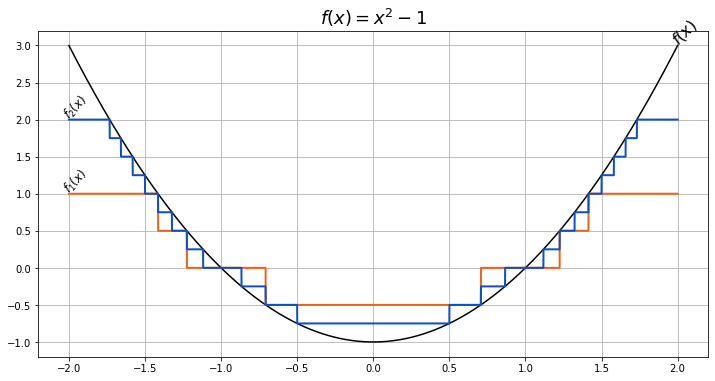

In [5]:
f = plot_sequence(lambda x: np.square(x) - 1, k=1, n_functions=2,
                  title='$f(x) = x^2-1$',
                  lim_inf=-2, lim_sup=2, colors=['#ec6517', '#0d4fcb'])

Podemos percatarnos con este sencillo ejemplo que las desigualdades antes mencionadas se satisfacen.

Probemos ahora con otro ejemplo, ahora $f(x) = \frac{1}{1 + x^2}$ y ahora con $f_2$ y $f_3$.

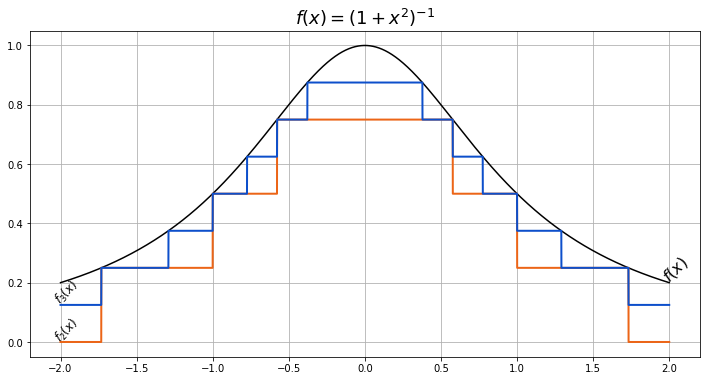

In [6]:
f = plot_sequence(lambda x: 1 / (1 + np.square(x)), k=2, n_functions=2,
                  title='$f(x) = (1+ x^{2})^{-1}$',
                  lim_inf=-2, lim_sup=2, colors=['#ec6517', '#0d4fcb'])

De igual manera que en el caso anterior, la desigualdad del teorema se satisface.

Ahora comprobemos la convergencia. En las gráficas anteriores se aprecia que la sucesión tiende acercarse cada vez más a $f$. Comprobemos esto con la función [_sigmoide_](https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide) $f(x) = \frac{1}{1 + e^{-x}}$

Para $k=1$,

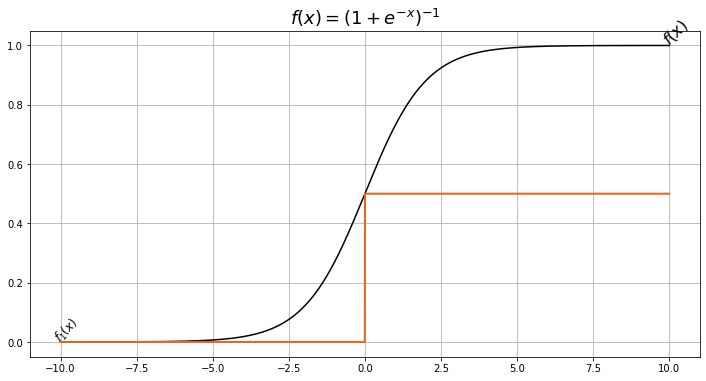

In [7]:
f = plot_sequence(lambda x: 1 / (1 + np.exp(-x)), k=1,
                  title='$f(x) = (1+ e^{-x})^{-1}$',
                  lim_inf=-10, lim_sup=10)

Claramente la primera función en la sucesión se acerca burdamente a la función $f$. Pero si aumentamos la $k$, esta aproximación mejora.

Para $k=3$

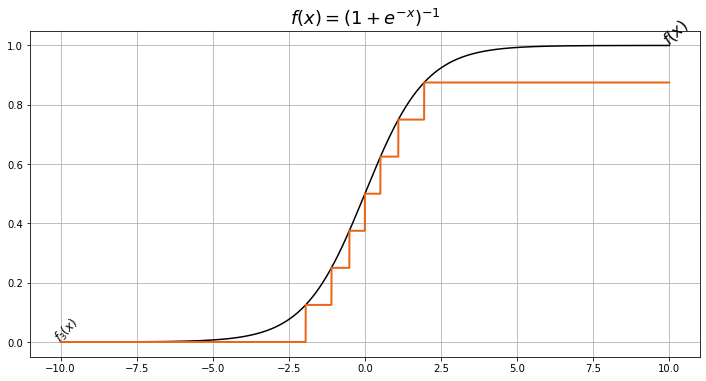

In [8]:
f = plot_sequence(lambda x: 1 / (1 + np.exp(-x)), k=3,
                  title='$f(x) = (1+ e^{-x})^{-1}$',
                  lim_inf=-10, lim_sup=10)

Claramente nuestra aproximación es mejor, pero no es suficiente. Para $k=5$,

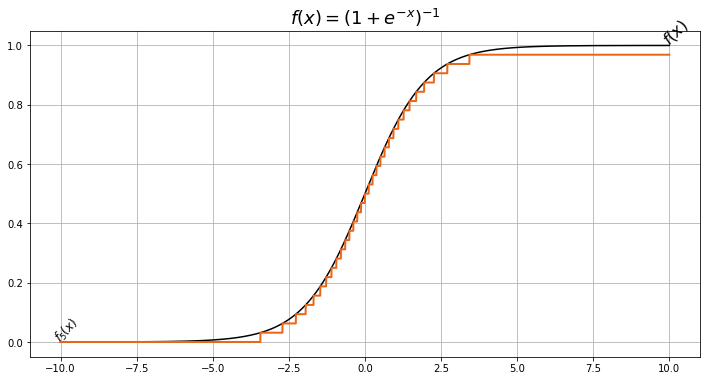

In [9]:
f = plot_sequence(lambda x: 1 / (1 + np.exp(-x)), k=5,
                  title='$f(x) = (1+ e^{-x})^{-1}$',
                  lim_inf=-10, lim_sup=10)

Finalmente, probemos con la función $f(x) = \sin(x)$ y comprobemos el teorema.

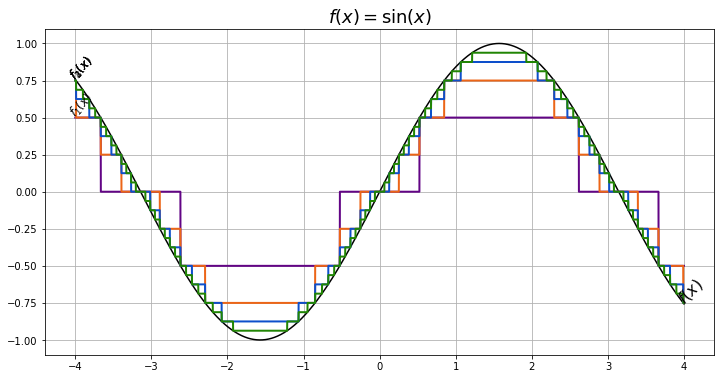

In [10]:
f = plot_sequence(lambda x: np.sin(x), k=1, n_functions=4, title='$f(x) = \sin(x)$',
                  lim_inf=-4, lim_sup=4, colors=['#620485', '#ec6517', '#0d4fcb', '#218504'])